Sigillito,V., Wing,S., Hutton,L., and Baker,K.. (1989). Ionosphere. UCI Machine Learning Repository. https://doi.org/10.24432/C5W01B.

https://archive.ics.uci.edu/dataset/52/ionosphere


In [23]:
pip install scikit-learn -U

In [24]:
import timeit
import warnings
import os

import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle

# Might require : pip install scikit-learn -U
from sklearn.model_selection import ValidationCurveDisplay

In [25]:
pip install ucimlrepo

In [26]:
#! pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [27]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


       Counts  Percentage
Class                    
g         225        64.0
b         126        36.0


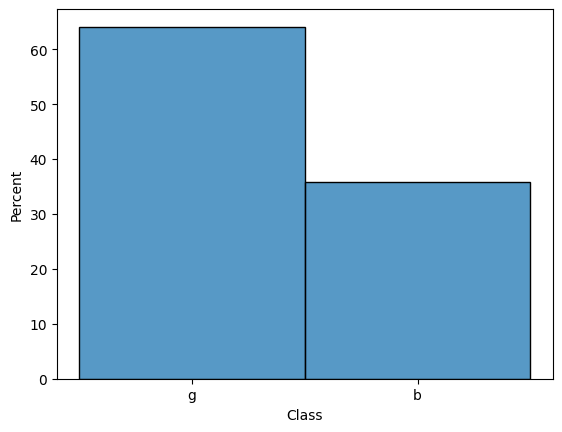

In [ ]:
print(pd.concat([y.value_counts(),round(100*y.value_counts()/y.count()[0])] ,axis=1).set_axis(['Counts', 'Percentage'], axis='columns'))
sns.histplot(y["Class"], legend=True, stat="percent")
plt.show()
plt.close()

In [ ]:
Y = y["Class"].map({'g': 0, 'b': 1})
Y

0      0
1      1
2      0
3      1
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: Class, Length: 351, dtype: int64

## Logistic regression

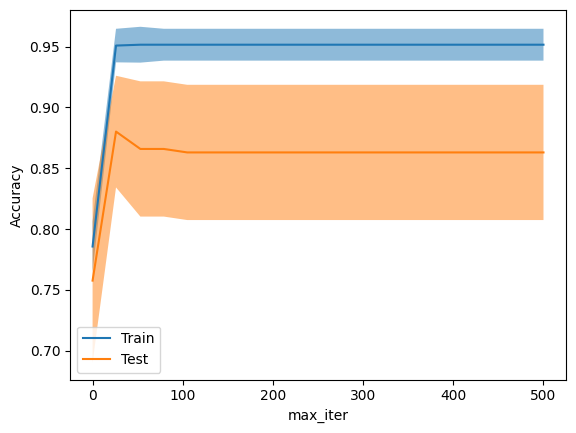

In [ ]:
X = np.where(np.isnan(X), 0, X)
Y = y["Class"].map({'g': 0, 'b': 1})

scaler = StandardScaler()
X=scaler.fit_transform(X)
X, Y = shuffle(X, Y, random_state=0)

ValidationCurveDisplay.from_estimator(
   LogisticRegression(penalty=None, solver="lbfgs", multi_class='ovr'),
   X, Y,
   param_name="max_iter",
   param_range= np.linspace(0, 500, 20).round().astype(int),
   scoring="accuracy",
   score_type="both",
   score_name="Accuracy",
   n_jobs=-1,
   )

### LR: Predicted probabilities distribution

(280, 34)
(71, 34)
(280,)
(71,)
(280, 34)
(71, 34)


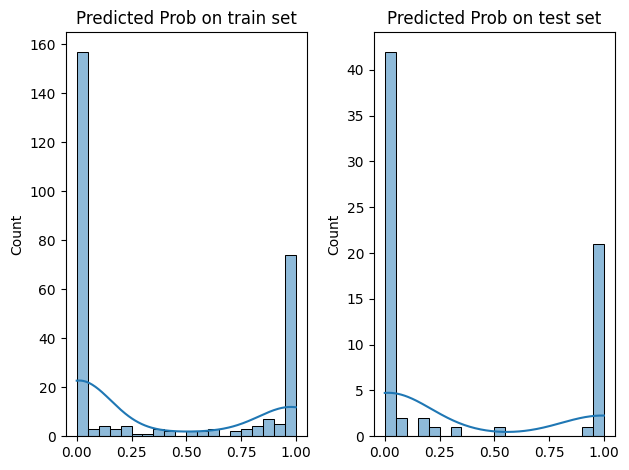

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=18)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

# Define and fit LogisticRegression
lr = LogisticRegression(penalty=None, solver="lbfgs", max_iter=2000)
lr.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2)
sns.histplot(lr.predict_proba(X_train)[:,1], ax=ax[0], binwidth=0.05, kde=True).set(title='Predicted Prob on train set')
sns.histplot(lr.predict_proba(X_test)[:,1],  ax=ax[1], binwidth=0.05, kde=True).set(title="Predicted Prob on test set")
fig.tight_layout()
fig.show()

### LR: Calibration Curve

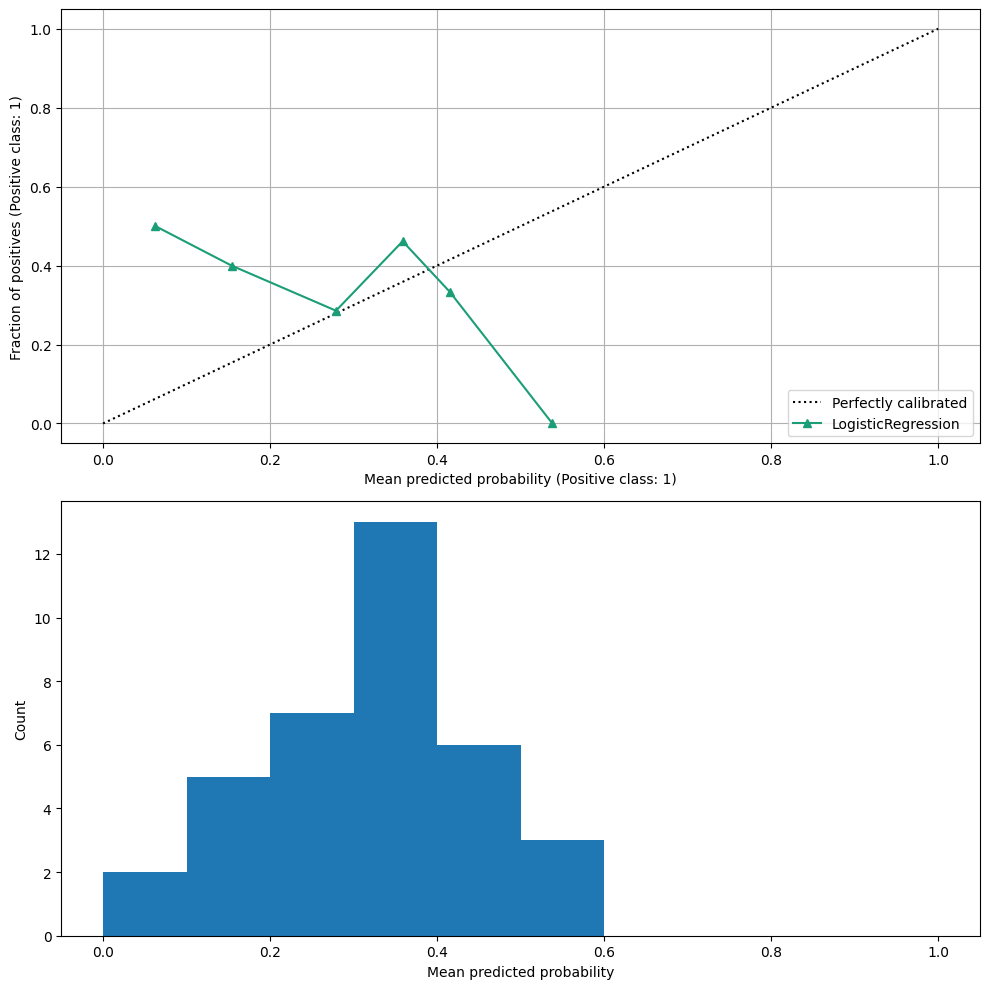

CPU times: user 495 ms, sys: 163 ms, total: 658 ms
Wall time: 487 ms


In [ ]:
%%time
# Taken (with adjustments) from:
# https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[0, :])
calibration_displays = {}
markers = ["^", "v", "s", "o"]

display = CalibrationDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    n_bins=10,
    ax=ax_calibration_curve,
    color=colors(0),
    marker=markers[0],
    name="LogisticRegression"
)
ax_calibration_curve.grid()

# Add histogram
ax= fig.add_subplot(gs[1, :])
ax.hist(
    display.y_prob,
    range=(0, 1),
    bins=10,
)
ax.set(xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

### LR: Confusion matrix

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        46
           1       0.78      0.72      0.75        25

    accuracy                           0.83        71
   macro avg       0.82      0.81      0.81        71
weighted avg       0.83      0.83      0.83        71



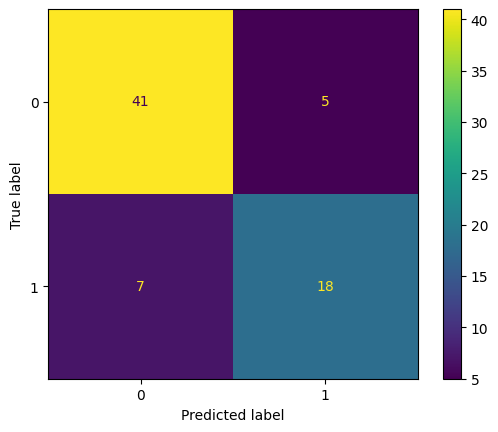

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

y_pred=lr.predict(X_test)

## The classification report shows how the model ends up generalizing on the majority class
## and thus performing badly on the minority class
print(classification_report(y_test, y_pred))

### LR: Comparing different class weights

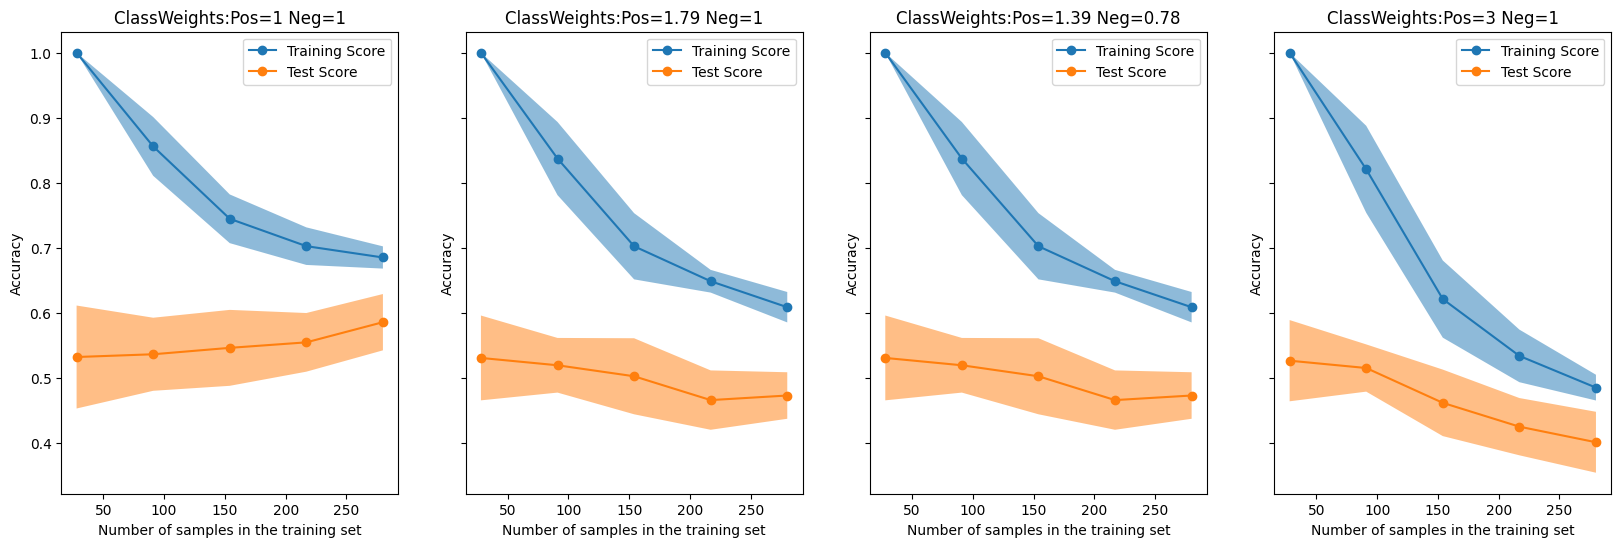

In [136]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

X = np.where(np.isnan(X), 0, X)
Y = y["Class"].map({'g': 0, 'b': 1})

scaler = StandardScaler()
X=scaler.fit_transform(X)
X, Y = shuffle(X, Y, random_state=0)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6), sharey=True)

lr11 = LogisticRegression(penalty=None, solver="lbfgs", class_weight={1:1, 0:1})
lr1e = LogisticRegression(penalty=None, solver="lbfgs", class_weight={1:np.sum(Y == 0) / np.sum(Y == 1), 0:1})
lr1e2 = LogisticRegression(penalty=None, solver="lbfgs", class_weight={1:(X.shape[0]/(2 * np.bincount(Y)))[1], 0:(X.shape[0]/(2 * np.bincount(Y)))[0]})
lr13 = LogisticRegression(penalty=None, solver="lbfgs", class_weight={1:3, 0:1})

common_params = {
    "X": X,
    "y": Y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}


for ax_idx, estimator in enumerate([lr11, lr1e, lr1e2, lr13]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title("ClassWeights:Pos={0} Neg={1}".format(round(estimator.class_weight[1],2),round(estimator.class_weight[0],2)))

### LR: Comparing multinomial LR and OVR LR

Dataset , train_samples=315, n_features=34, n_classes=2
[model=One versus Rest, solver=lbfgs] Number of epochs: 200
[model=One versus Rest, solver=lbfgs] Number of epochs: 1400
[model=One versus Rest, solver=lbfgs] Number of epochs: 2600
[model=One versus Rest, solver=lbfgs] Number of epochs: 3800
[model=One versus Rest, solver=lbfgs] Number of epochs: 5000
Test accuracy for model ovr: 0.5833
% non-zero coefficients for model ovr, per class:
 [97.05882353]
Run time (5000 epochs) for model ovr:0.02
[model=Multinomial, solver=lbfgs] Number of epochs: 200
[model=Multinomial, solver=lbfgs] Number of epochs: 1400
[model=Multinomial, solver=lbfgs] Number of epochs: 2600
[model=Multinomial, solver=lbfgs] Number of epochs: 3800
[model=Multinomial, solver=lbfgs] Number of epochs: 5000
Test accuracy for model multinomial: 0.5833
% non-zero coefficients for model multinomial, per class:
 [97.05882353]
Run time (5000 epochs) for model multinomial:0.02
Example run in 0.511 s


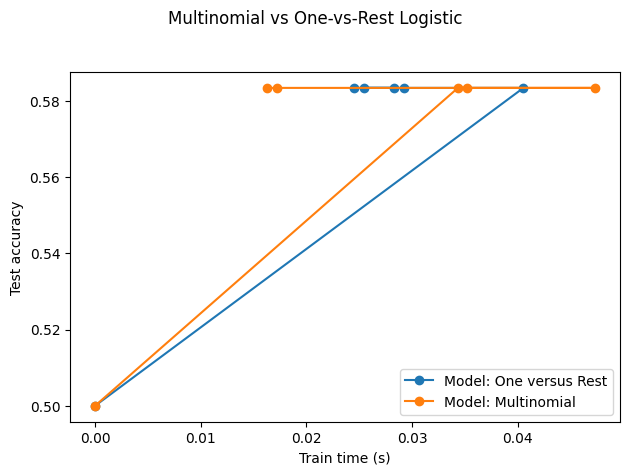

In [ ]:
# Taken (with adjustments) from:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-20newsgroups-py
# Author: Arthur Mensch


warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

solver = "lbfgs"

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42, stratify=Y, test_size=0.1
)

train_samples, n_features = X_train.shape
n_classes = np.unique(Y).shape[0]

print(
    "Dataset , train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "ovr": {"name": "One versus Rest", "iters": list(np.linspace(200, 5000, 5).round().astype(int))
    },
    "multinomial": {"name": "Multinomial", "iters": list(np.linspace(200, 5000, 5).round().astype(int))
},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        lr = LogisticRegression(
            solver=solver,
            multi_class=model,
            penalty=None,
            max_iter=this_max_iter,
            random_state=42,
        )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic" )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

### LR: Comparing behaviour on balanced and imbalanced datasets

In [28]:
# Taken (with adjustments) from:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-20newsgroups-py
# Author: Arthur Mensch

from sklearn import metrics

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

solver = "lbfgs"

train_samples, n_features = X.shape
minority_class_samples = Y[Y==1].shape[0]

n_classes = np.unique(Y).shape[0]

print(
    "Dataset , train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "balanced": {"name": "Balanced", "batches": list(np.linspace(2000, minority_class_samples, 10).round().astype(int))
    },
    "imbalanced": {"name": "Imbalanced", "batches": list(np.linspace(2000, train_samples, 10).round().astype(int))
},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    precision_scores = [0]
    times = [0]
    all_batches = [0]
    densities = [1]

    model_params = models[model]

    if model_params["name"] == "Balanced":
      y_iter = pd.concat([Y.loc[Y==1], Y.loc[Y==0][:Y[Y==1].shape[0]]]).sample(frac=1,random_state=42)
      X_iter = X.loc[y_iter.index]

    elif model_params["name"] == "Imbalanced":
      X_iter=X
      y_iter=Y
    else:
      print("EXIT")

    # Small number of epochs for fast runtime
    for this_batch in model_params["batches"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_batch)
        )
        lr = LogisticRegression(
            solver=solver,
            penalty=None,
            max_iter=2000,
            random_state=42,
        )

        X_batch = X_iter[:this_batch]
        y_batch = y_iter[:this_batch]

        print(X_train.shape)
        print(y_train.shape)

        print(X_test.shape)
        print(y_test.shape)

        print(X_iter.shape)
        print(y_iter.shape)

        print(X_batch.shape)
        print(X_batch.fillna(0).shape)
        print(y_batch.shape)

        X_train, X_test, y_train, y_test = train_test_split(
        X_batch.fillna(0),
        y_batch,
        random_state=42,
        stratify=y_batch,
        test_size=0.1)

        print("Dataset , train_samples=%i, n_features=%i, n_classes=%i"
    % (X_train.shape[0], X_train.shape[1], np.unique(y_train).shape[0]))


        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        precision_score = metrics.precision_score(y_test,y_pred)
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        precision_scores.append(precision_score)
        densities.append(density)
        times.append(train_time)
        all_batches.append(this_batch)

    models[model]["times"] = times
    models[model]["all_batches"] = all_batches
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    models[model]["precision_scores"] = precision_scores

    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["batches"][-1], model, times[-1])
    )


Dataset , train_samples=351, n_features=34, n_classes=2
[model=Balanced, solver=lbfgs] Number of epochs: 2000
(315, 34)
(315,)
(36, 34)
(36,)
(252, 34)
(252,)
(252, 34)
(252, 34)
(252,)
Dataset , train_samples=226, n_features=34, n_classes=2
[model=Balanced, solver=lbfgs] Number of epochs: 1792
(226, 34)
(226,)
(26, 34)
(26,)
(252, 34)
(252,)
(252, 34)
(252, 34)
(252,)
Dataset , train_samples=226, n_features=34, n_classes=2
[model=Balanced, solver=lbfgs] Number of epochs: 1584
(226, 34)
(226,)
(26, 34)
(26,)
(252, 34)
(252,)
(252, 34)
(252, 34)
(252,)
Dataset , train_samples=226, n_features=34, n_classes=2
[model=Balanced, solver=lbfgs] Number of epochs: 1375
(226, 34)
(226,)
(26, 34)
(26,)
(252, 34)
(252,)
(252, 34)
(252, 34)
(252,)
Dataset , train_samples=226, n_features=34, n_classes=2
[model=Balanced, solver=lbfgs] Number of epochs: 1167
(226, 34)
(226,)
(26, 34)
(26,)
(252, 34)
(252,)
(252, 34)
(252, 34)
(252,)
Dataset , train_samples=226, n_features=34, n_classes=2
[model=Balance

Example run in 24.711 s


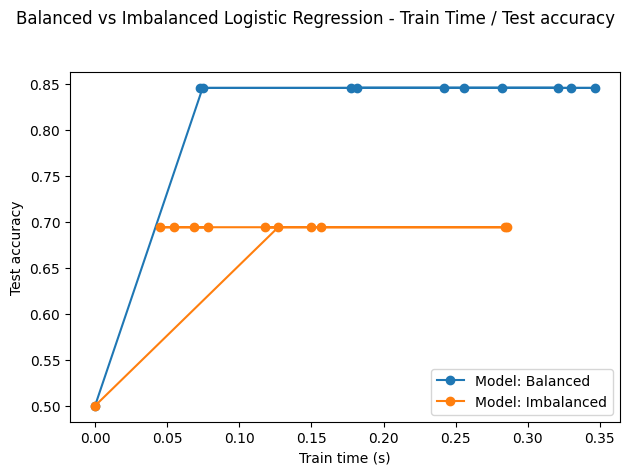

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    all_batches = models[model]["all_batches"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Balanced vs Imbalanced Logistic Regression - Train Time / Test accuracy" )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

Example run in 176.098 s


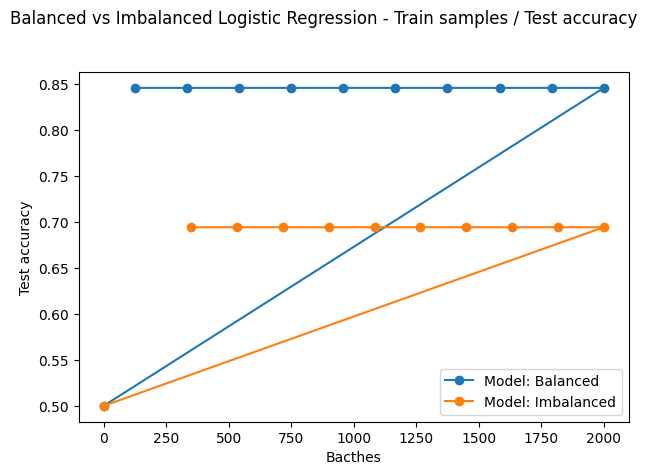

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    all_batches = models[model]["all_batches"]
    accuracies = models[model]["accuracies"]
    ax.plot(all_batches, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Bacthes")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Balanced vs Imbalanced Logistic Regression - Train samples / Test accuracy" )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

Example run in 80.418 s


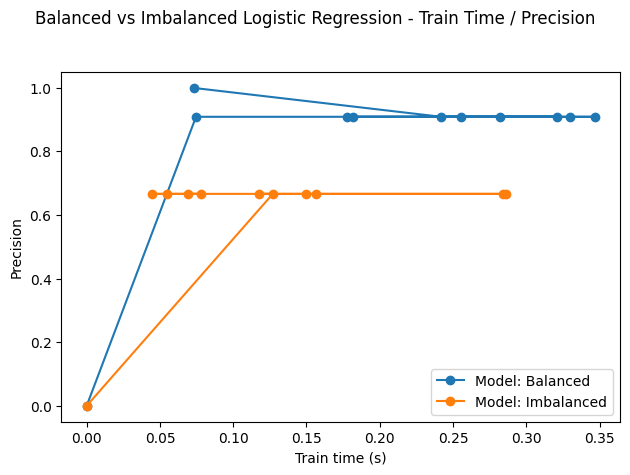

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    all_batches = models[model]["all_batches"]
    accuracies = models[model]["accuracies"]
    precision_scores = models[model]["precision_scores"]
    ax.plot(times, precision_scores, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Precision")
ax.legend()
fig.suptitle("Balanced vs Imbalanced Logistic Regression - Train Time / Precision" )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

Example run in 162.628 s


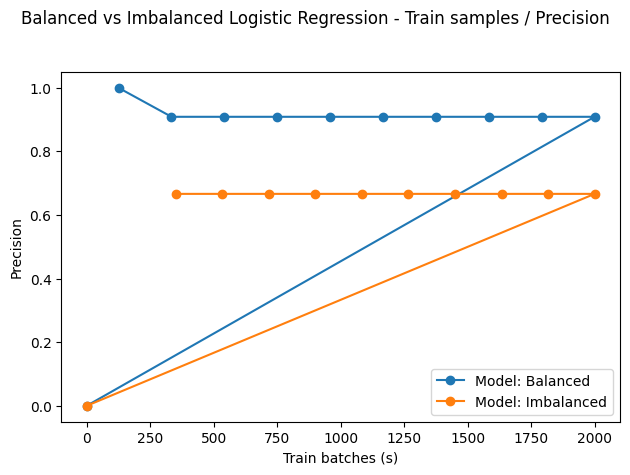

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    all_batches = models[model]["all_batches"]
    accuracies = models[model]["accuracies"]
    precision_scores = models[model]["precision_scores"]
    ax.plot(all_batches, precision_scores, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train batches (s)")
    ax.set_ylabel("Precision")
ax.legend()
fig.suptitle("Balanced vs Imbalanced Logistic Regression - Train samples / Precision" )
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()

## One Class Classification

In [179]:
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.manifold import TSNE

In [169]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

Y = y["Class"].map({'g': 1, 'b': -1})
outliers = Y[Y==-1]
print("outliers.shape", outliers.shape)

scaler = StandardScaler()
X=scaler.fit_transform(X)
X, Y = shuffle(X, Y, random_state=0)


X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=18)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

outliers.shape (126,)
(280, 34)
(71, 34)
(280,)
(71,)


In [158]:
# define outliers
outliers = Y[Y==-1]
print("outliers.shape", outliers.shape)

# calculate nu
nu = outliers.shape[0] / Y.shape[0]

# fit model
ocsvm = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=0.001)
ocsvm.fit(X_train)


# predict and print evaluation report
y_pred_train = ocsvm.predict(X_train)

print("\nTrain scores")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ", metrics.precision_score(y_train, y_pred_train))
print("Recall: ", metrics.recall_score(y_train, y_pred_train))
print("F1: ", metrics.f1_score(y_train, y_pred_train,  pos_label=1))
print("Area under curve (AUC): ", metrics.roc_auc_score(y_train, y_pred_train))

# predict and print evaluation report
y_pred = ocsvm.predict(X_test)

print("\nTest scores")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred, pos_label=1))
print("Area under curve (AUC): ", metrics.roc_auc_score(y_test, y_pred))

outliers.shape (126,)

Train scores
Accuracy:  0.7357142857142858
Precision:  0.7932960893854749
Recall:  0.7932960893854749
F1:  0.7932960893854749
Area under curve (AUC):  0.7134797278610543

Test scores
Accuracy:  0.6619718309859155
Precision:  0.7291666666666666
Recall:  0.7608695652173914
F1:  0.7446808510638298
Area under curve (AUC):  0.6204347826086957


In [175]:
data = pd.concat([ionosphere.data.features,ionosphere.data.targets], axis=1)
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [176]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_clusters = tsne.fit_transform(X)
tsne0 = tsne_clusters[:,0]
tsne1 = tsne_clusters[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.001s...
[t-SNE] Computed neighbors for 351 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 1.423173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.286530
[t-SNE] KL divergence after 300 iterations: 0.531108


In [178]:
data["tsne0"]=tsne0
data["tsne1"]=tsne1
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class,tsne0,tsne1
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g,-2.798475,7.873277
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b,-4.200032,-10.897059
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g,-4.953359,-4.158576
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b,-3.643240,-6.346495
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g,-3.262147,-5.445099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g,-0.048162,-0.133201
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g,-3.972493,-4.829879
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g,1.702719,3.303378
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g,-4.870111,-0.217198


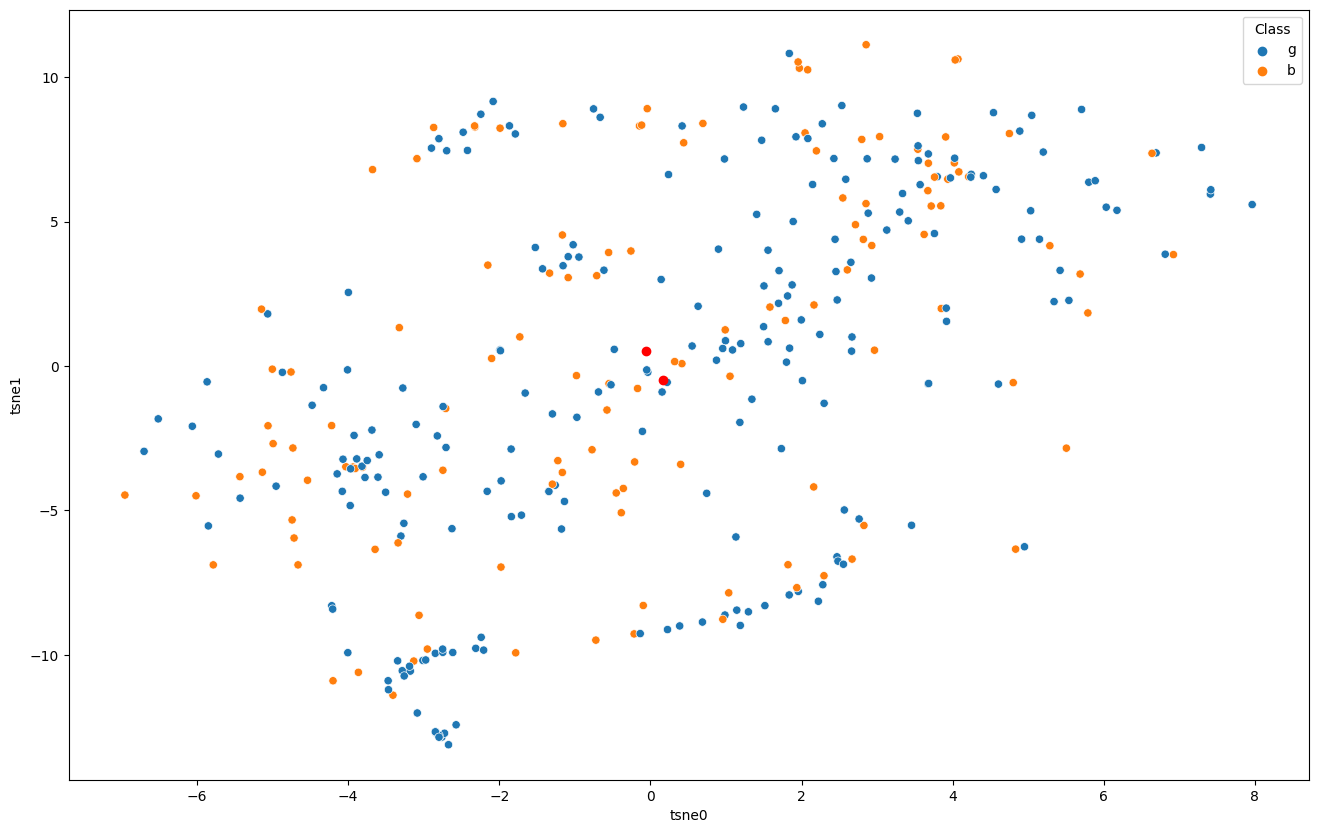

In [185]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="Class",
    data=data,
    legend="full",
    alpha=1
)

# plot cluster centers
tsne_centers = data.groupby('Class').agg({'tsne0':'mean', 'tsne1':'mean'}).reset_index()
plt.scatter(x="tsne0", y="tsne1", data=tsne_centers, c='r')


plt.show()